In [1]:
import torch
import torch.nn
from matplotlib import pyplot as plt

In [2]:
from model import Generator, InfoDiscriminator, InfoGAN

In [3]:
dataset = 'MNIST'
img_size = (11, 11) if dataset == 'MNIST' else (41, 51)
channels = 1 if dataset == 'MNIST' else 3
parametric_features = 3
noise_features = 5

In [4]:
infogan = InfoGAN(noise_features=10, 
                  categorical_features=[10, 3], 
                  uniform_features=2, 
                  guassian_features=0, 
                  inter_img_size=img_size, 
                  dataset=dataset, 
                  batch_size=4,
                  gen_lr=1e-3, disc_lr=2e-4,
                  lambda_=1)

In [5]:
infogan.train_one_epoch()

Loss: -3.3742: 100%|██████████| 15000/15000 [28:30<00:00,  8.77it/s]


In [18]:
p1 = torch.zeros(10)
p1[1] = 1.0
p2 = torch.zeros(3)
p2[1] = 1.0
x = torch.hstack([torch.randn(10), p1, p2, torch.tensor([0.55, -0.21])]).unsqueeze(0)
x

tensor([[ 0.8821,  1.6821,  0.6490, -0.0414,  1.5893, -0.6568, -0.9401,  1.0564,
         -0.0583, -0.6358,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.5500,
         -0.2100]])

In [21]:
infogan.eval()
img = infogan.generator(x)

In [22]:
img.shape

torch.Size([1, 1, 28, 28])

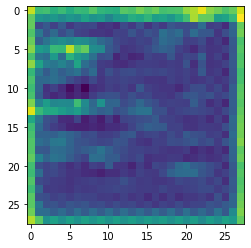

In [27]:
plt.imshow(img[0, 0, ...].detach().numpy())